<a href="https://colab.research.google.com/github/ten-jampa/LLM_grind/blob/main/HF_datasets_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U datasets huggingface_hub fsspec

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.4/515.4 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 7.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.33.0
    Uninstalling huggingface-hub-0.33.0:
      Successfully uninstalled huggingface-hub-0.33.0
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3

In [2]:
## Imports

from datasets import load_dataset_builder

# load_dataset_builder allows you to load a dataset builder to inspect the card of a Dataset without commiting to downloading it

In [3]:
ds_builder = load_dataset_builder("cornell-movie-review-data/rotten_tomatoes")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

In [8]:
# read info about the description
ds_builder.info.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['neg', 'pos'], id=None)}

In [10]:
ds_builder.info.description

''

If you're happy with the dataset, then load it with load_dataset():

In [6]:
from datasets import load_dataset
ds = load_dataset("cornell-movie-review-data/rotten_tomatoes")
ds

train.parquet:   0%|          | 0.00/699k [00:00<?, ?B/s]

validation.parquet:   0%|          | 0.00/90.0k [00:00<?, ?B/s]

test.parquet:   0%|          | 0.00/92.2k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8530 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1066 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1066 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 8530
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
})

In [11]:
## Splits

# A Split is a specific subser of a dataset like train or test.

from datasets import get_dataset_split_names
get_dataset_split_names('cornell-movie-review-data/rotten_tomatoes')

['train', 'validation', 'test']

In [13]:
# Then you can load a specific split with the split parameters

dataset = load_dataset('cornell-movie-review-data/rotten_tomatoes', split = 'train')

In [14]:
dataset

Dataset({
    features: ['text', 'label'],
    num_rows: 8530
})

## Know your dataset

There are two types of datset objects, a regular Dataset and thena iterable Dataset. Dataset provides fast random access to the rows, and memory-mapping so that loading even large datasets only uses a relatively small amount of device memory. But for really, really big datasets that won’t even fit on disk or in memory, an IterableDataset allows you to access and use the dataset without waiting for it to download completely!

In [15]:
# Dataset

dataset = load_dataset("cornell-movie-review-data/rotten_tomatoes", split="train")

In [16]:
# indexing
# A dataset contains columns of data, and each column can be a different type of data

dataset[0]

{'text': 'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .',
 'label': 1}

In [17]:
# use the - operator to start from the end
dataset[-1]

{'text': 'things really get weird , though not particularly scary : the movie is all portent and no content .',
 'label': 0}

In [19]:
# indexing by the column name

dataset['text'][:5]

['the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .',
 'the gorgeously elaborate continuation of " the lord of the rings " trilogy is so huge that a column of words cannot adequately describe co-writer/director peter jackson\'s expanded vision of j . r . r . tolkien\'s middle-earth .',
 'effective but too-tepid biopic',
 'if you sometimes like to go to the movies to have fun , wasabi is a good place to start .',
 "emerges as something rare , an issue movie that's so honest and keenly observed that it doesn't feel like one ."]

In [20]:
# You can combine row and coloumn name
dataset[0]['text']


'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .'

In [21]:
# important to remeber that indexing order matters, especially when working with large audio and image datasets

import time

start_time = time.time()

text = dataset[0]["text"]

end_time = time.time()

print(f"Elapsed time: {end_time - start_time:.4f} seconds")


start_time = time.time()

text = dataset["text"][0]

end_time = time.time()

print(f"Elapsed time: {end_time - start_time:.4f} seconds")

Elapsed time: 0.0006 seconds
Elapsed time: 0.0110 seconds


In [27]:
for ds_entry in dataset:
  print(ds_entry)
  break

{'text': 'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .', 'label': 1}


In [22]:
# We see from above that the indexing by column and then row takes abbout x100 longer than indexing by row and then column

In [23]:
# Slicing

dataset[:3]

{'text': ['the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .',
  'the gorgeously elaborate continuation of " the lord of the rings " trilogy is so huge that a column of words cannot adequately describe co-writer/director peter jackson\'s expanded vision of j . r . r . tolkien\'s middle-earth .',
  'effective but too-tepid biopic'],
 'label': [1, 1, 1]}

In [24]:
# to see how panda Df can be created, just for good practice
import pandas as pd

df_sub = pd.DataFrame(dataset[:3])
df_sub.head()

text  label
0  the rock is destined to be the 21st century's ...      1
1  the gorgeously elaborate continuation of " the...      1
2                     effective but too-tepid biopic      1

In [25]:
## Iterable Dataset
# You set the streaming parameter to True

iterable_dataset = load_dataset('ethz/food101', split='train', streaming=True)

README.md: 0.00B [00:00, ?B/s]

In [26]:
for example in iterable_dataset:
    print(example)
    break

{'image': <PIL.Image.Image image mode=RGB size=384x512 at 0x7B8CEF8AEED0>, 'label': 6}


## Preprocess

In addition to loading datasets, 🤗 Datasets other main goal is to offer a diverse set of preprocessing functions to get a dataset into an appropriate format for training with your machine learning framework.

There are many possible ways to preprocess a dataset, and it all depends on your specific dataset. Sometimes you may need to rename a column, and other times you might need to unflatten nested fields. 🤗 Datasets provides a way to do most of these things. But in nearly all preprocessing cases, depending on your dataset modality, you’ll need to:

    Tokenize a text dataset.
    Resample an audio dataset.
    Apply transforms to an image dataset.

The last preprocessing step is usually setting your dataset format to be compatible with your machine learning framework’s expected input format.


In [28]:
# Preprocess
!pip install -U transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 18.4 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.52.4
    Uninstalling transformers-4.52.4:
      Successfully uninstalled transformers-4.52.4


In [29]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
dataset = load_dataset('cornell-movie-review-data/rotten_tomatoes', split='train')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [30]:
# Call your tokenizer on the first row of text in the dataset

tokenizer(dataset[0]['text']) #returns the tokenized and tranformed text


{'input_ids': [101, 1996, 2600, 2003, 16036, 2000, 2022, 1996, 7398, 2301, 1005, 1055, 2047, 1000, 16608, 1000, 1998, 2008, 2002, 1005, 1055, 2183, 2000, 2191, 1037, 17624, 2130, 3618, 2084, 7779, 29058, 8625, 13327, 1010, 3744, 1011, 18856, 19513, 3158, 5477, 4168, 2030, 7112, 16562, 2140, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [31]:
# 3. fastest way to tokenize your entire DS is to use the map() function

def tokenization(example):
  return tokenizer(example['text'])

dataset = dataset.map(tokenization, batched = True) # this mapping adds to the dataset object

Map:   0%|          | 0/8530 [00:00<?, ? examples/s]

In [32]:
df_sub = pd.DataFrame(dataset[:10])
df_sub

text  label  \
0  the rock is destined to be the 21st century's ...      1   
1  the gorgeously elaborate continuation of " the...      1   
2                     effective but too-tepid biopic      1   
3  if you sometimes like to go to the movies to h...      1   
4  emerges as something rare , an issue movie tha...      1   
5  the film provides some great insight into the ...      1   
6  offers that rare combination of entertainment ...      1   
7  perhaps no picture ever made has more literall...      1   
8  steers turns in a snappy screenplay that curls...      1   
9  take care of my cat offers a refreshingly diff...      1   

                                           input_ids  \
0  [101, 1996, 2600, 2003, 16036, 2000, 2022, 199...   
1  [101, 1996, 9882, 2135, 9603, 13633, 1997, 100...   
2  [101, 4621, 2021, 2205, 1011, 8915, 23267, 160...   
3  [101, 2065, 2017, 2823, 2066, 2000, 2175, 2000...   
4  [101, 19391, 2004, 2242, 4678, 1010, 2019, 327...   
5  [101, 1996, 2143, 3640, 2070, 2307, 12369, 204...   
6  [101, 4107, 2008, 4678, 5257, 1997, 4024, 1998...   
7  [101, 3383, 2053, 3861, 2412, 2081, 2038, 2062...   
8  [101, 20634, 2015, 4332, 1999, 1037, 10245, 76...   
9  [101, 2202, 2729, 1997, 2026, 4937, 4107, 1037...   

                                      token_type_ids  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2                     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
5  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
6                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   
7  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
8  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
9  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                      attention_mask  
0  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  
1  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  
2                     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]  
3  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  
4  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  
5  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  
6                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]  
7  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  
8  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  
9  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...

In [33]:
## 4. Set the formate of your dataset to be compatible with your ML framework

In [35]:
dataset.set_format(type='torch',
                  columns=["input_ids", "token_type_ids", "attention_mask", "label"]) # transforming them into torch tensors
dataset.format['type']

'torch'

### Apply Data Augmetations

The most common preprocessing you’ll do with image datasets is data augmentation, a process that introduces random variations to an image without changing the meaning of the data. This can mean changing the color properties of an image or randomly cropping an image. You are free to use any data augmentation library you like, and 🤗 Datasets will help you apply your data augmentations to your dataset.


In [56]:
#1. Start by loading the Beans Dataset, the Image feature, and the feature extractor corresponding to a pretrained ViT model
from transformers import AutoFeatureExtractor

from datasets import load_dataset, Image

feature_extractor = AutoFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")

dataset = load_dataset("AI-Lab-Makerere/beans", split="train")

/usr/local/lib/python3.11/dist-packages/transformers/models/vit/feature_extraction_vit.py:30: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [57]:
dataset

Dataset({
    features: ['image_file_path', 'image', 'labels'],
    num_rows: 1034
})

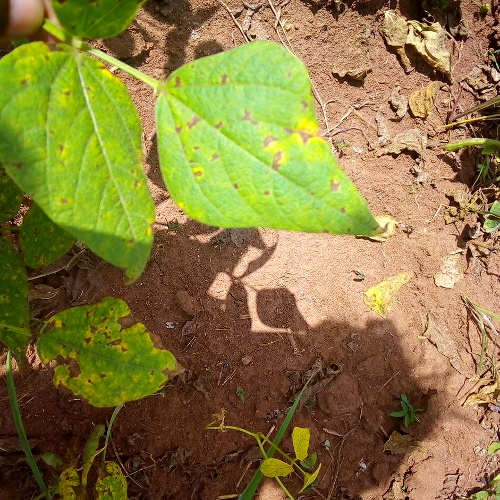

In [44]:
#2. Index into the first row of the datset. When you call the image column of the dataset, the underlying PIL object is automatically decoded into an image.

dataset[0]['image']

In [45]:
dataset = dataset.cast_column("image", Image(mode="RGB"))

In [48]:
!pip install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 574.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [52]:
import torchvision

In [58]:
# Now apply some transforms to the image

from torchvision.transforms import RandomRotation

rotate = RandomRotation(degrees=(0,90))

def transform(examples):
  examples['pixel_values'] = [rotate(image) for image in examples['image']]
  return examples


In [59]:
dataset = dataset.cast_column("image", Image(mode="RGB"))

In [60]:
dataset

Dataset({
    features: ['image_file_path', 'image', 'labels'],
    num_rows: 1034
})

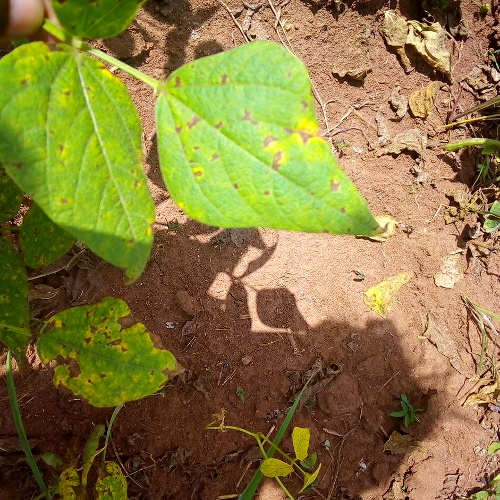

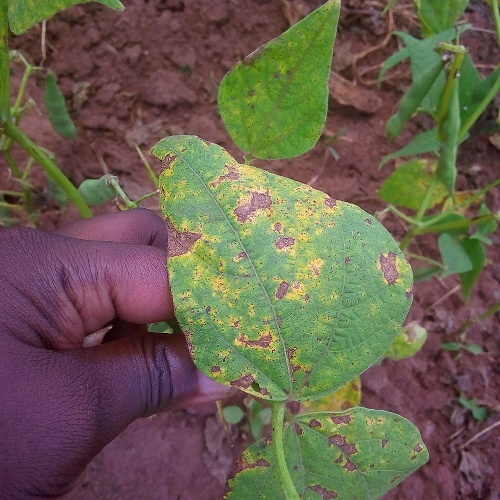

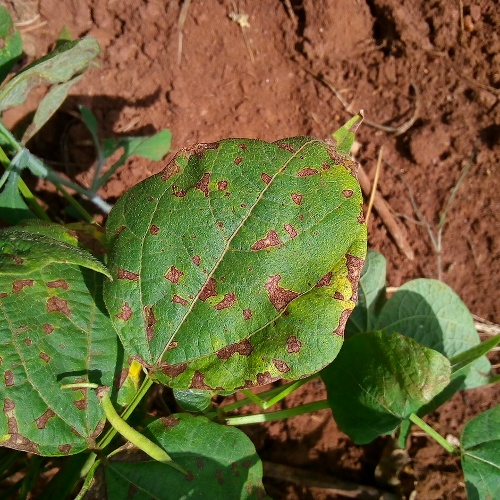

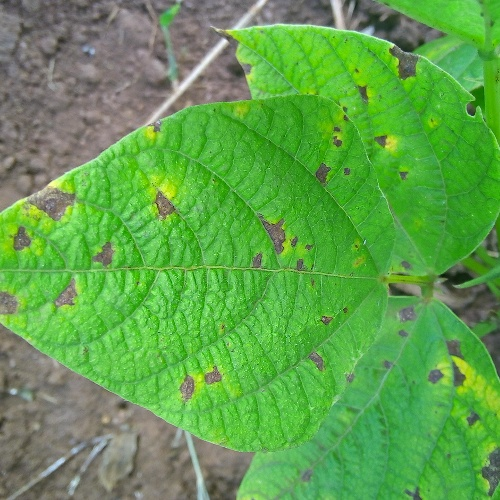

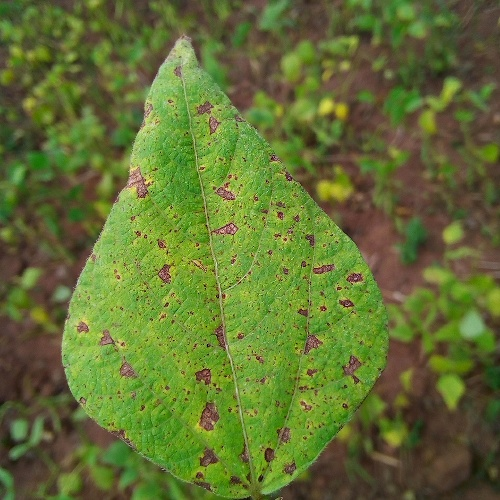

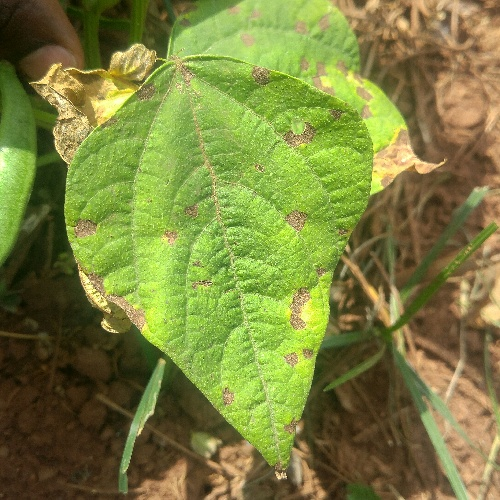

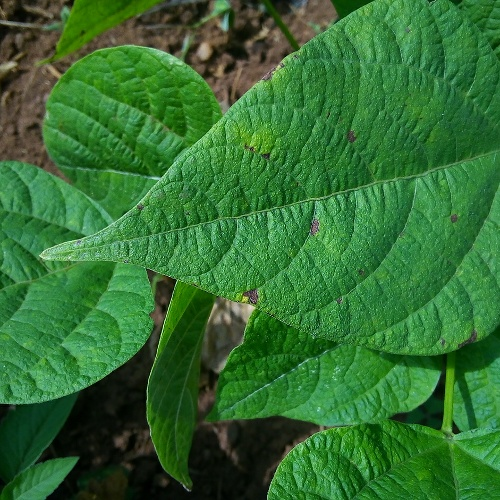

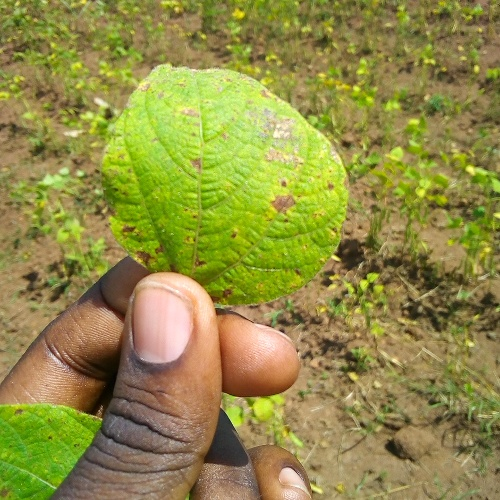

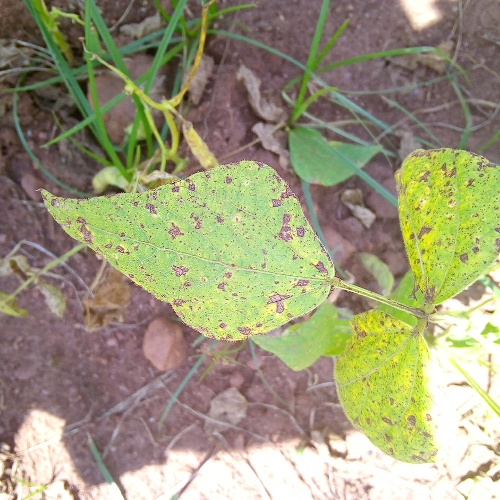

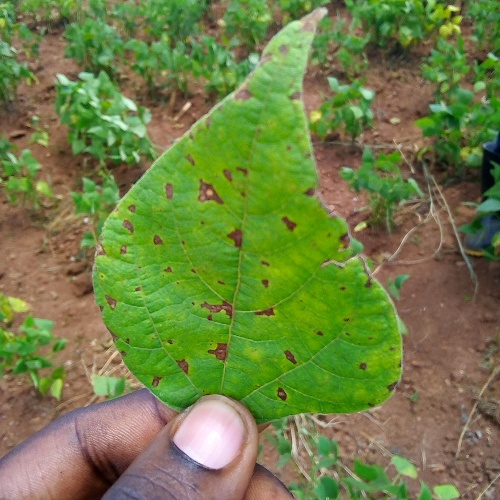

In [66]:
from IPython.display import display

for i in range(10):
  display(dataset[i]['image'])